### Student Information
Name: 翁瑞晴

Student ID: 108065513

GitHub ID: ritaweng

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here
import pandas as pd

# First Part

In [2]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [4]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


# ** >>> Exercise 2 (take home):**
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [5]:
X.loc[10:20:2,'text']

10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...
18    From: tom_milligan@rainbow.mentorg.com Subject...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
Name: text, dtype: object

# >>> Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
𝐻𝑖𝑛𝑡  : why .isnull() didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
因為在id 5中 儲存的是空字串，但空字串也是字串，因此isnull function回報為True，仍然認為格子中有東西。
B 和 C cell中顯示出來的都是NaN，但儲存方式不一樣，B中是真的沒有東西，Ｃ是存了一個叫做'NaN'的字串

# >>> Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.



#Answer here
隨機取樣1000個data之後，data數量變少了(只有1000個)

# >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

### Sampling

In [9]:
X_sample = X.sample(n=1000)

In [10]:
X_sample[0:4]

,text,category,category_name
1890,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...,1,comp.graphics
1189,From: sun075!Gerry.Palo@uunet.uu.net (Gerry Pa...,3,soc.religion.christian
2168,From: aa888@freenet.carleton.ca (Mark Baker) S...,3,soc.religion.christian
1889,From: bil@okcforum.osrhe.edu (Bill Conner) Sub...,0,alt.atheism


In [11]:
print(X_sample.category_name.value_counts())

soc.religion.christian    287
comp.graphics             258
sci.med                   238
alt.atheism               217
Name: category_name, dtype: int64


In [12]:
print(X.category_name.value_counts())

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


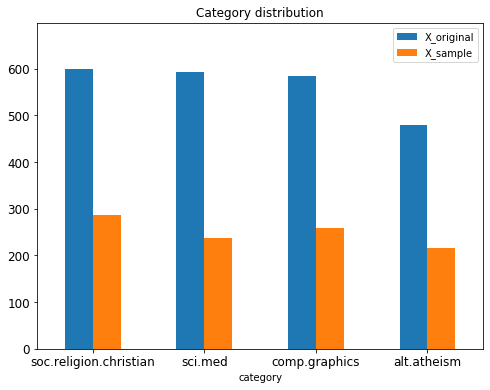

In [13]:
#Answer here
pd_ori = pd.DataFrame({'category':X.category_name.value_counts().index, 'X_original':X.category_name.value_counts().values})
pd_ori = pd_ori.set_index('category')
pd_sampling = pd.DataFrame({'category':X_sample.category_name.value_counts().index, 'X_sample':X_sample.category_name.value_counts().values})
pd_sampling = pd_sampling.set_index('category')
pd_all = pd.merge(pd_ori, pd_sampling, on = 'category')

#plot pd_all
upper_bound = max(X.category.value_counts())+100
pd_all.plot(kind = 'bar', title = 'Category distribution', ylim = [0, upper_bound], rot = 0, fontsize = 12, figsize = (8,6))

# **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
count_vect.get_feature_names()[0:38]
#X_counts[0:5, 0:100].toarray()
X_array = X_counts[4:5, 0:50].toarray()
#X_array

### Example

In [18]:
#from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird'] # “dog cat fish” 為輸入列表元素,即代表一個文章的字串
cv = CountVectorizer()#建立詞袋資料結構
cv_fit=cv.fit_transform(texts)
print(texts)
print(cv.get_feature_names())    #['bird', 'cat', 'dog', 'fish'] 列表形式呈現文章生成的詞典

print(cv.vocabulary_)      # {‘dog’:2,'cat':1,'fish':3,'bird':0} 字典形式呈現，key：詞，value:詞在字典中的位置

print(cv_fit)
#（0,3）1   第0個列表元素，**詞典中索引為3的元素**， 詞頻

print(cv_fit.toarray()) #.toarray() 是將結果轉化為稀疏矩陣矩陣的表示方式；
#[[0 1 1 1]
# [0 2 1 0]
# [1 0 0 1]
# [1 0 0 0]]
print(cv_fit.toarray().sum(axis=0))  #每個詞在所有文件中的詞頻
#[2 3 2 2]


['dog cat fish', 'dog cat cat', 'fish bird', 'bird']
['bird', 'cat', 'dog', 'fish']
{'dog': 2, 'cat': 1, 'fish': 3, 'bird': 0}
  (0, 2)	1
  (0, 1)	1
  (0, 3)	1
  (1, 2)	1
  (1, 1)	2
  (2, 3)	1
  (2, 0)	1
  (3, 0)	1
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


### MY ANSWER

In [19]:
#Answer here
for i in X_array:
    for j in range(len(i)):
        if i[j]==1:
            print(count_vect.get_feature_names()[j])

00
01


# **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [20]:
size_ = 1000
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:size_]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:size_]]
plot_z = X_counts[0:size_, 0:size_].toarray()

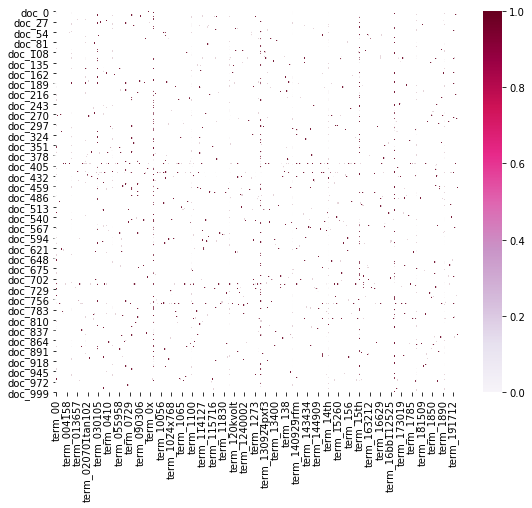

In [21]:
#Answer here
#透過排序集中有價值的資訊在相近的區塊，減少視覺搜尋的時間

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
masked = np.ones((size_, size_), dtype=bool)
for i in range(size_):
    for j in range(size_):
        if plot_z[i][j] == 1:
            masked[i][j] = False
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True, mask=masked)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [22]:
#Answer here
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

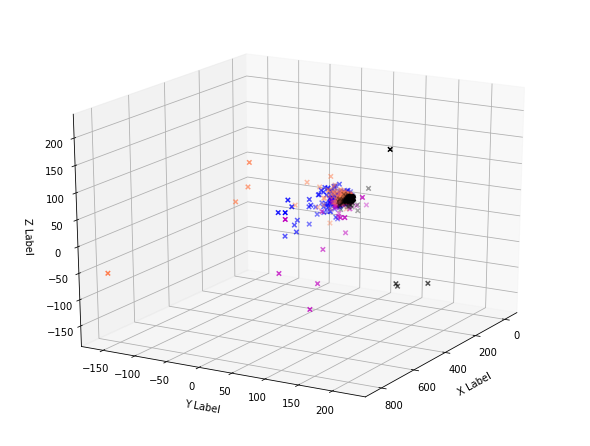

In [23]:
#plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='x')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(20, 30)
plt.show()

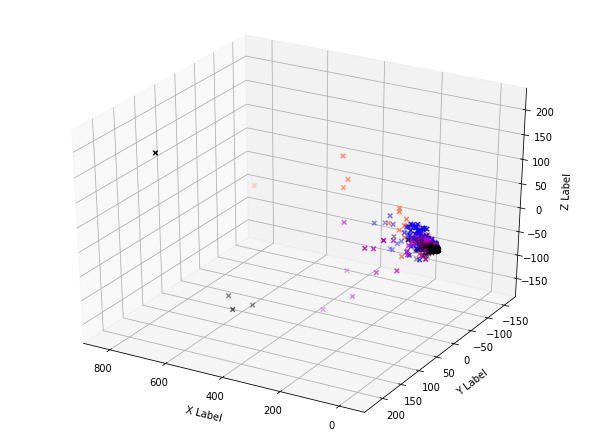

In [24]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='x')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(30, 120)
plt.show()

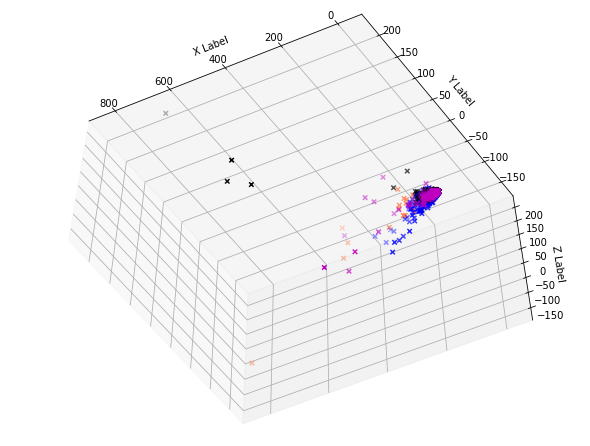

In [25]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='x')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(-60, 120)
plt.show()

In [26]:
#描述

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [158]:
# Answer for Exercise 13
import plotly.express as px
import plotly.graph_objects as go
pd_freq = pd.DataFrame({'terms':count_vect.get_feature_names()[:40], 'frequency':term_frequencies[:40]})
layout = go.Layout(xaxis=dict(type='category'))
fig = go.Figure([go.Bar(x=pd_freq.terms, y=pd_freq.frequency)],layout = layout)
fig.show()
print(pd_freq)

   terms  frequency
0     00        134
1     10         92
2    100          1
3     11          2
4     12          1
5     13          3
6     15          1
7    15g          1
8   15pm          1
9     17          1
10    18          2
11  18th          1
12  1928          1
13  1947          3
14  1948          1
15  1949          1
16  1971          1
17  1973          2
18  1979          1
19  1980          3
20  1986          1
21  1995          2
22  1998          1
23    20          1
24  2000          1
25  2005          2
26  2006          1
27  2007          1
28  20th          1
29  2160          1
30    23          1
31    24          1
32    25          1
33   2mp          1
34    30          5
35   30s          1
36   325         13
37    35         95
38   350          4
39   375          1


# >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [150]:
import numpy as np  
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt
x_data = []
y_data = []
for i in range(400):
    if term_frequencies[i] > 3: # print frequency more than 3
        x_data.append(count_vect.get_feature_names()[i])
        y_data.append(term_frequencies[i])
layout = go.Layout(xaxis=dict(type='category'))
fig = go.Figure([go.Bar(x=x_data, y=y_data)],layout = layout)
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

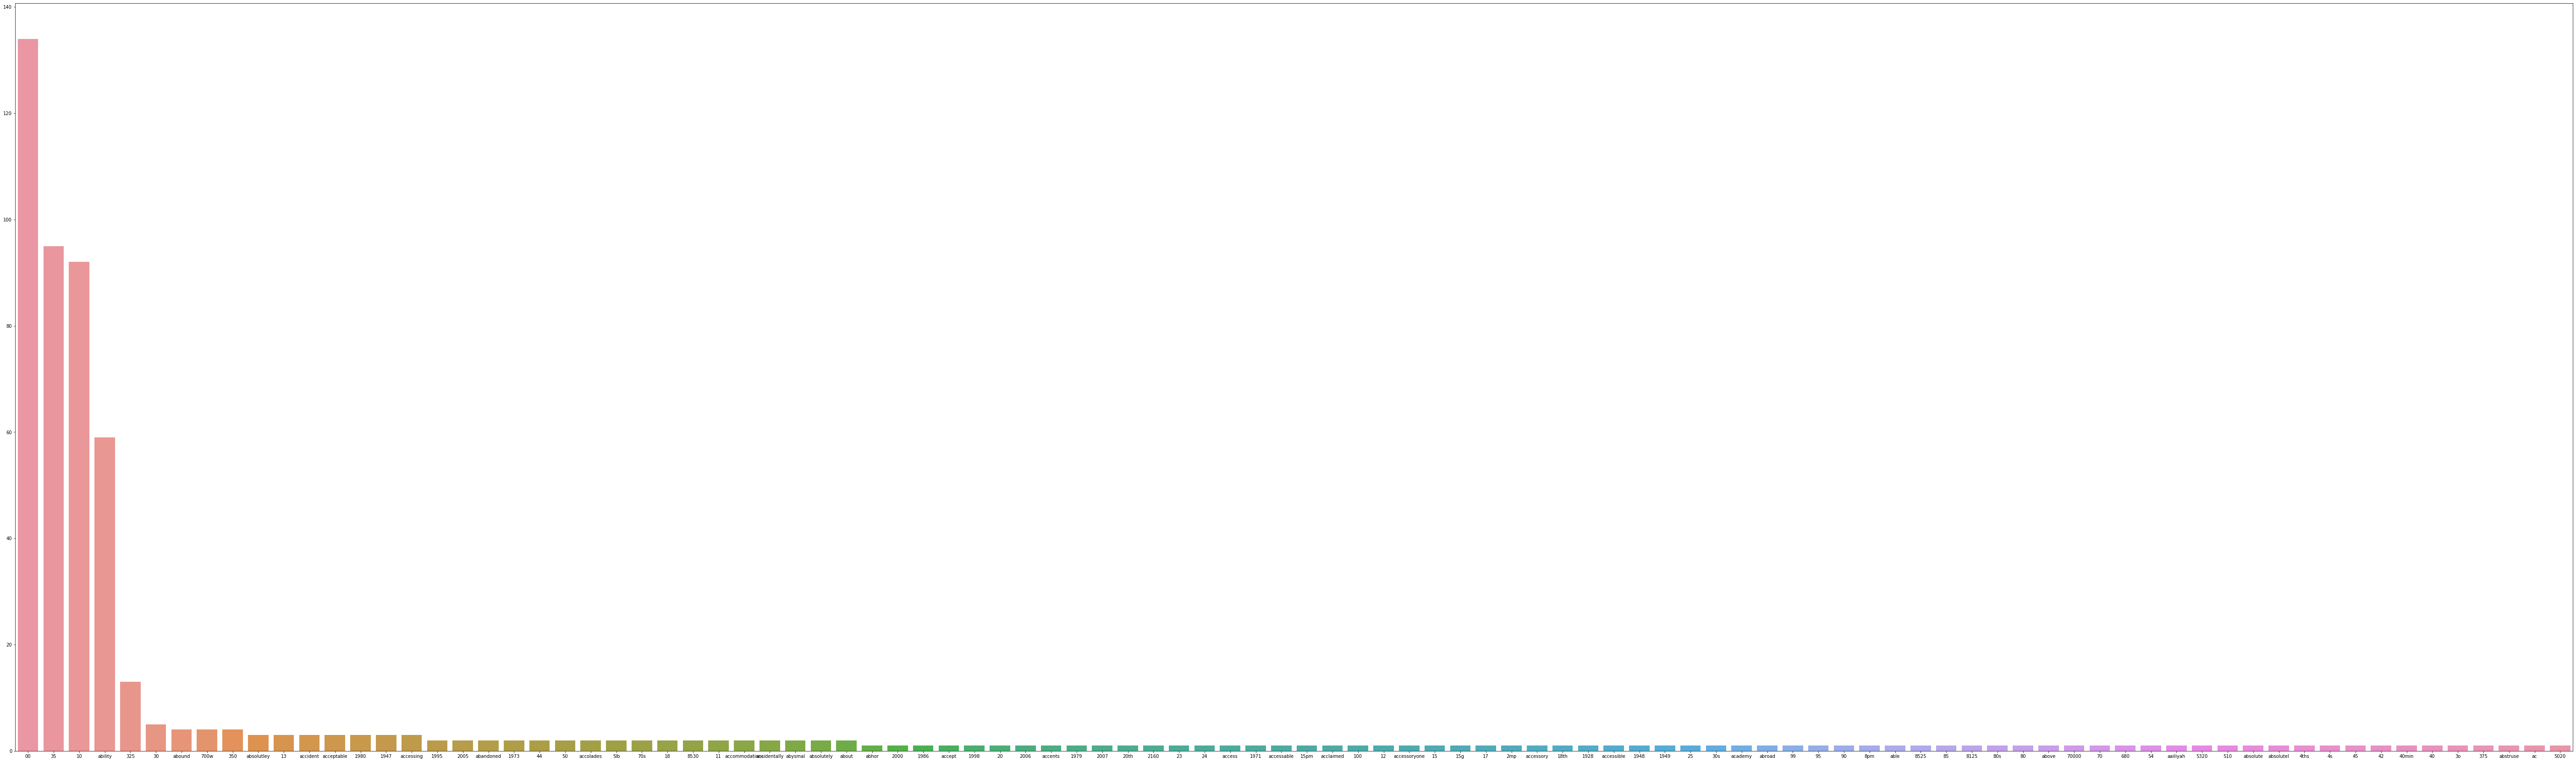

In [153]:
# Answer here
#0的值都刪除，只留下有意義的資料，或是排序集中有意義的資料在同一邊
plt.subplots(figsize=(100, 30))
term_fp_idx = np.argsort(term_frequencies[:100])
g = sns.barplot(x=np.array(count_vect.get_feature_names()[:100])[term_fp_idx][::-1], 
                y=term_frequencies[:300][term_fp_idx][::-1])
plt.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here
# Yes, it work.

# Second Part

In [30]:
categories = ['1', '0']

In [31]:
fp = open('sentiment labelled sentences/amazon_cells_labelled.txt', 'r')
data = []
label = []
words = fp.readlines()
for k in words:
    data.append(k[0:-2].strip())
    label.append(k[-2])

fp = open('sentiment labelled sentences/imdb_labelled.txt', 'r')
words = fp.readlines()
for k in words:
    data.append(k[0:-2].strip())
    label.append(k[-2])

fp = open('sentiment labelled sentences/yelp_labelled.txt', 'r')
words = fp.readlines()
for k in words:
    data.append(k[0:-2].strip())
    label.append(k[-2])

X_2 = pd.DataFrame(data={'sentence':data,'label':label})
X_2

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [32]:
df1 = pd.read_table('sentiment labelled sentences/amazon_cells_labelled.txt', sep = "\t",header = None)
df2 = pd.read_table('sentiment labelled sentences/imdb_labelled.txt', sep = "\t",header = None)
df3 = pd.read_table('sentiment labelled sentences/yelp_labelled.txt', sep = "\t",header = None)
df1 = df1.append(df2, ignore_index = True)
df_all = df1.append(df3, ignore_index = True) 
df_all

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


### ** >>> Exercise 1<<<**

In [33]:
# Answer here
for t in words[:7]:
    print(t)

Wow... Loved this place.	1

Crust is not good.	0

Not tasty and the texture was just nasty.	0

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1

The selection on the menu was great and so were the prices.	1

Now I am getting angry and I want my damn pho.	0

Honeslty it didn't taste THAT fresh.)	0



In [34]:
words[0:2]

['Wow... Loved this place.\t1\n', 'Crust is not good.\t0\n']

### **>>> Exercise 2 (take home):**

In [35]:
#Answer here
X_2.loc[10:20]

,sentence,label
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
12,If the two were seperated by a mere 5+ ft I st...,0
13,Very good quality though,1
14,"The design is very odd, as the ear ""clip"" is n...",0
15,Highly recommend for any one who has a blue to...,1
16,I advise EVERYONE DO NOT BE FOOLED!,0
17,So Far So Good!.,1
18,Works great!.,1
19,It clicks into place in a way that makes you w...,0


In [36]:
X_2[10:20][["sentence","label"]]

,sentence,label
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
12,If the two were seperated by a mere 5+ ft I st...,0
13,Very good quality though,1
14,"The design is very odd, as the ear ""clip"" is n...",0
15,Highly recommend for any one who has a blue to...,1
16,I advise EVERYONE DO NOT BE FOOLED!,0
17,So Far So Good!.,1
18,Works great!.,1
19,It clicks into place in a way that makes you w...,0


In [37]:
X_2.loc[-10:]

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


### ** >>> Exercise 3 (5 min): **  

In [38]:
#answer 
X_2[X_2["label"] == '0'][::10][0:5]

,sentence,label
0,So there is no way for me to plug it in here i...,0
20,I went on Motorola's website and followed all ...,0
37,Poor Talk Time Performance.,0
60,Essentially you can forget Microsoft's tech su...,0
83,The battery runs down quickly.,0


### >>> **Exercise 4 (5 min):** 

In [39]:
X_2.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

### Sampling

In [40]:
X_2_sample = X_2.sample(n=1000)

### >>> **Exercise7<<<** 

1    506
0    494
Name: label, dtype: int64


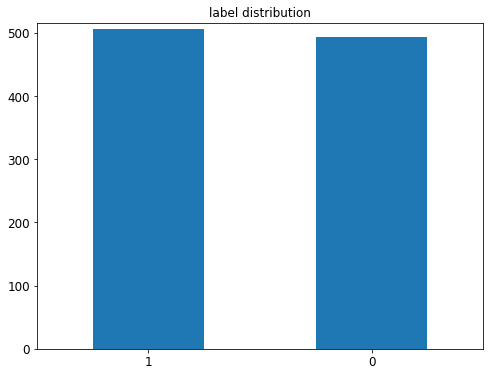

In [41]:
# Answer here
upper_bound = max(X_2_sample.label.value_counts())+10
print(X_2_sample.label.value_counts())

# plot barchart for X_sample
X_2_sample.label.value_counts().plot(kind = 'bar', title = 'label distribution', ylim = [0, upper_bound], rot = 0, fontsize = 12, figsize = (8,6))


### >>> **Exercise8<<<** 

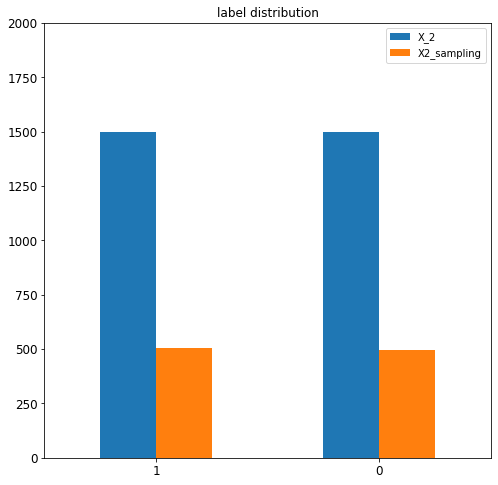

In [42]:
#Answer here
X2_ori = X_2.label.value_counts()
X2_sampling = X_2_sample.label.value_counts()
index = X_2.label.value_counts().index
df = pd.DataFrame({'X_2': X2_ori, 'X2_sampling':X2_sampling}, index = index)
df.plot(kind = 'bar', title = 'label distribution', ylim = [0, 2000], rot = 0, fontsize = 12, figsize = (8,8))



### >>> Exercise 9

In [44]:
# Answer here
#TA's answer
analyze(" ".join(list(X_2 [:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

### >>> Exercise 10 

In [160]:
count_vect2 = CountVectorizer()
X2_counts = count_vect2.fit_transform(X_2.sentence)
#analyze = count_vect2.build_analyzer()
count_vect2.get_feature_names()[0:38]
X2_array = X2_counts[0:5, 0:200].toarray()

In [161]:
#Answer for Exercise 10
for i in X2_array:
    for j in range(len(i)):
        if i[j]==1:
            print(count_vect2.get_feature_names()[j])

45


### >>> Exercise 11

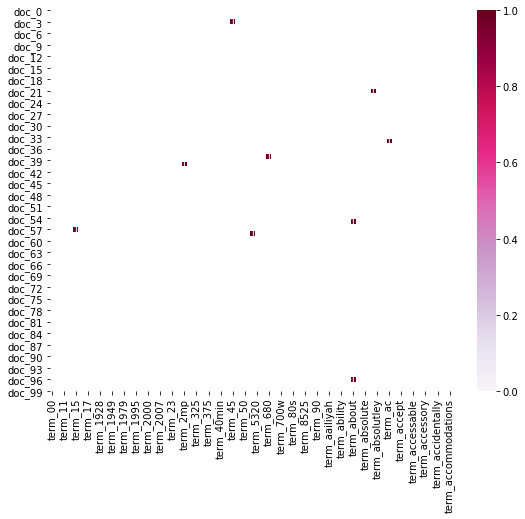

In [162]:
# Answer here
size_ = 100
plot_x = ["term_"+str(i) for i in count_vect2.get_feature_names()[0:size_]]
plot_y = ["doc_"+ str(i) for i in list(X_2.index)[0:size_]]
plot_z = X2_counts[0:size_, 0:size_].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
masked = np.ones((size_, size_), dtype=bool)
for i in range(size_):
    for j in range(size_):
        if plot_z[i][j] == 1:
            masked[i][j] = False
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True, mask=masked)

## Exercise 12

In [163]:
from sklearn.decomposition import PCA
X2_reduced = PCA(n_components = 3).fit_transform(X2_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

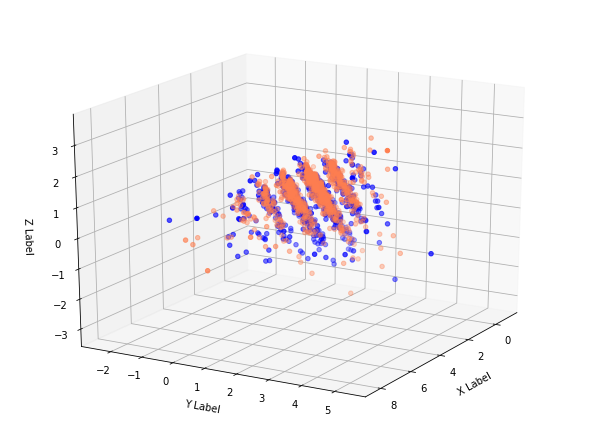

In [164]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs2 = X2_reduced[X_2['label'] == category].T[0]
    ys2 = X2_reduced[X_2['label'] == category].T[1]
    zs2 = X2_reduced[X_2['label'] == category].T[2]
    
    ax.scatter(xs2, ys2, zs2, c = c, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(20, 30)
plt.show()

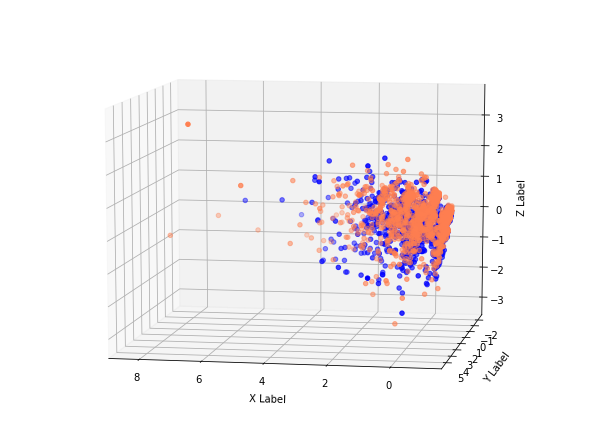

In [165]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs2 = X2_reduced[X_2['label'] == category].T[0]
    ys2 = X2_reduced[X_2['label'] == category].T[1]
    zs2 = X2_reduced[X_2['label'] == category].T[2]
    
    ax.scatter(xs2, ys2, zs2, c = c, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(10, 100)
plt.show()

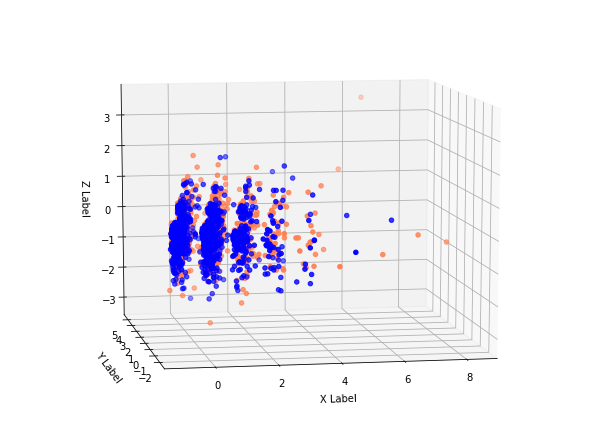

In [166]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs2 = X2_reduced[X_2['label'] == category].T[0]
    ys2 = X2_reduced[X_2['label'] == category].T[1]
    zs2 = X2_reduced[X_2['label'] == category].T[2]
    
    ax.scatter(xs2, ys2, zs2, c = c, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(10, 260)
plt.show()

### >>> **Exercise 13 (take home):

In [167]:
#Answer for Exercise 13
#import plotly.express as px
#import plotly.graph_objects as go
pd_freq2 = pd.DataFrame({'sentence':count_vect2.get_feature_names()[:40], 'frequency':term_frequencies[:40]})
#layout2 = go.Layout(xaxis=dict(type='label'))
#fig = go.Figure([go.Bar(x=pd_freq2.sentence, y=pd_freq.frequency)],layout = layout2)
#fig.show()
print(pd_freq2)

   sentence  frequency
0        00        134
1        10         92
2       100          1
3        11          2
4        12          1
5        13          3
6        15          1
7       15g          1
8      15pm          1
9        17          1
10       18          2
11     18th          1
12     1928          1
13     1947          3
14     1948          1
15     1949          1
16     1971          1
17     1973          2
18     1979          1
19     1980          3
20     1986          1
21     1995          2
22     1998          1
23       20          1
24     2000          1
25     2005          2
26     2006          1
27     2007          1
28     20th          1
29     2160          1
30       23          1
31       24          1
32       25          1
33      2mp          1
34       30          5
35      30s          1
36      325         13
37       35         95
38      350          4
39      375          1


### >>> **Exercise 14 (take home):

### >>> **Exercise 15

### TFIDF

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
vectorizer = TfidfVectorizer()
v = vectorizer.fit_transform(X_2.sentence)
print(vectorizer.get_feature_names())
v

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', '

<3000x5155 sparse matrix of type '<class 'numpy.float64'>'
	with 31578 stored elements in Compressed Sparse Row format>

In [62]:
print(v.shape)

(3000, 5155)


In [81]:
df_tfidf = pd.DataFrame(v.toarray(), columns=vectorizer.get_feature_names())

In [137]:
df_tfidf

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
df_tfidf.loc[0].sort_values(ascending=False)[:20]

converter    0.398295
unless       0.331879
plug         0.308619
in           0.295611
us           0.275411
way          0.249129
go           0.231512
me           0.228651
no           0.223395
by           0.223395
here         0.222777
there        0.207632
so           0.187466
for          0.156208
to           0.127489
is           0.120684
it           0.119817
the          0.086716
features     0.000000
feel         0.000000
Name: 0, dtype: float64

In [83]:
X_2['label']

0       0
1       1
2       1
3       0
4       1
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Name: label, Length: 3000, dtype: object

In [80]:
from sklearn.model_selection import train_test_split

X = df_tfidf
y = X_2['label']

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Naive Bayes classifier

In [89]:
from sklearn.datasets import make_classification

nb_samples = 300
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_train.shape[0],(y_train != y_pred).sum()))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test_pred != y_test).sum()))

Number of mislabeled points out of a total 2010 points : 80
Number of mislabeled points out of a total 990 points : 0


### Comment here

In [115]:
count_vect.shape

(2010, 5155)

## Word frequency features


In [116]:
X_2.sentence[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [118]:
#count_vect = CountVectorizer()
X_2_BoW = count_vect2.fit_transform(X_2.sentence).toarray()
#analyze = count_vect2.build_analyzer()
#count_vect2.get_feature_names()[0:38]
#X2_array = X2_counts[0:5, 0:200].toarray()
print(X_2_BoW)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [119]:
# split train and test data

y = X_2['label']

X_train_BoW, X_test_BoW, y_train_BoW, y_test_BoW = train_test_split(X_2_BoW, y)

In [120]:
X_train_BoW.shape

(2250, 5155)

In [121]:
X_test_BoW.shape

(750, 5155)

In [123]:
gnb = GaussianNB()
gnb = gnb.fit(X_train_BoW, y_train_BoW)
y_train_pred = gnb.predict(X_train_BoW)
y_test_pred = gnb.predict(X_test_BoW)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_train.shape[0],(y_train_BoW != y_train_pred).sum()))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test_pred != y_test_BoW).sum()))

Number of mislabeled points out of a total 2010 points : 274
Number of mislabeled points out of a total 990 points : 247
